In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
df_boston=pd.read_csv('boston_housing/housing.data',delim_whitespace=True,header=None)
df_boston.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [3]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [4]:
y=boston_data.target

# Brief Introduction to Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
X=df[['LSTAT']].values

In [18]:
tree=DecisionTreeRegressor(max_depth=4)

In [19]:
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
 sort_idx=X.flatten().argsort()

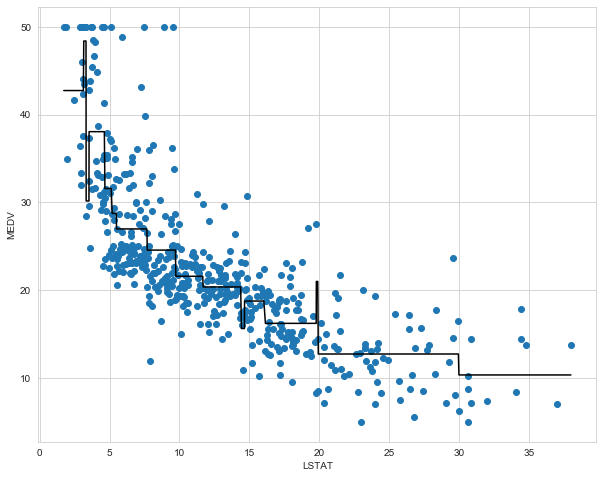

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV');

Using max_depth of 5 leads to overfitting, let's try 2 instead

In [22]:
tree=DecisionTreeRegressor(max_depth=2)

In [23]:
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
 sort_idx=X.flatten().argsort()

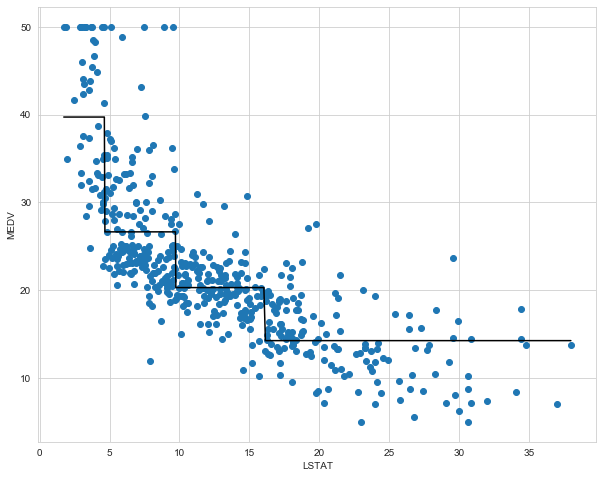

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],tree.predict(X[sort_idx]),color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# Brief Introduction to Random Forest

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
X=df.values
#y=df['MEDV'].values

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest = RandomForestRegressor(n_estimators=500,criterion='mse',random_state=42,n_jobs=-1)

In [32]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [33]:
y_train_pred=forest.predict(X_train)

In [34]:
y_test_pred=forest.predict(X_test)

In [35]:
print("MSE train: {0:.4f},test:{1:.4f}".format(
mean_squared_error(y_train,y_train_pred),
 mean_squared_error(y_test,y_test_pred)    ))

MSE train: 1.8700,test:9.3921


In [36]:
print("R2 train: {0:.4f},test:{1:.4f}".format(
r2_score(y_train,y_train_pred),
 r2_score(y_test,y_test_pred)    ))

R2 train: 0.9787,test:0.8740


# Brief Introduction to AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostRegressor

In [39]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                       n_estimators=500,random_state=42)

In [40]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [41]:
y_train_pred=ada.predict(X_train)

In [42]:
y_test_pred=ada.predict(X_test)

In [43]:
print("MSE train: {0:.4f},test:{1:.4f}".format(
mean_squared_error(y_train,y_train_pred),
 mean_squared_error(y_test,y_test_pred)    ))

MSE train: 4.6605,test:13.4949


In [44]:
print("R2 train: {0:.4f},test:{1:.4f}".format(
r2_score(y_train,y_train_pred),
 r2_score(y_test,y_test_pred)    ))

R2 train: 0.9470,test:0.8189


# Revisiting feature importance

# According To AdaBoost

In [47]:
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [48]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [49]:
result=pd.DataFrame(ada.feature_importances_,df.columns)
result.columns=['feature']

In [50]:
result.sort_values(by='feature',ascending=False)

,feature
LSTAT,0.430179
RM,0.235896
DIS,0.137436
PTRATIO,0.041850
NOX,0.037114
CRIM,0.031048
B,0.021933
TAX,0.021889
RAD,0.018937
INDUS,0.010837


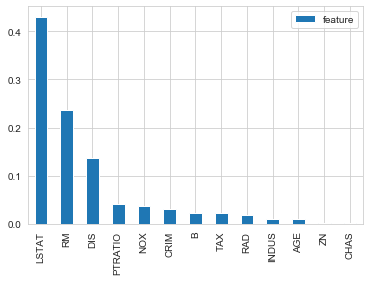

In [51]:
result.sort_values(by='feature',ascending=False).plot(kind="bar")

# According to Random Forest

In [53]:
forest.feature_importances_

array([0.03213849, 0.00166784, 0.00677542, 0.00131141, 0.01508521,
       0.4038535 , 0.01414013, 0.06280815, 0.00467201, 0.0120068 ,
       0.01833147, 0.0127986 , 0.41441098])

In [54]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [55]:
result=pd.DataFrame(forest.feature_importances_,df.columns)
result.columns=['feature']

In [56]:
result.sort_values(by='feature',ascending=False)

,feature
LSTAT,0.414411
RM,0.403853
DIS,0.062808
CRIM,0.032138
PTRATIO,0.018331
NOX,0.015085
AGE,0.014140
B,0.012799
TAX,0.012007
INDUS,0.006775


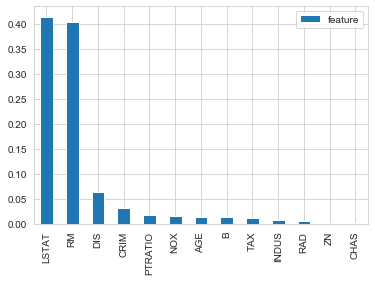

In [57]:
result.sort_values(by='feature',ascending=False).plot(kind="bar")